In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Cargar Datos
Data = pd.read_csv('C:/ANALISIS DE DATOS/Anexo 2 - Dataset Vehicle/car details v4.csv')

# Mostrar Datos
Data.head(40)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [4]:
# Descripción de los datos
Data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


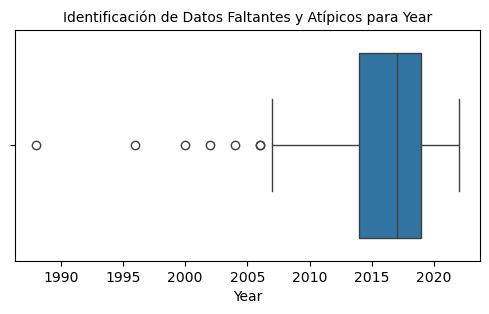

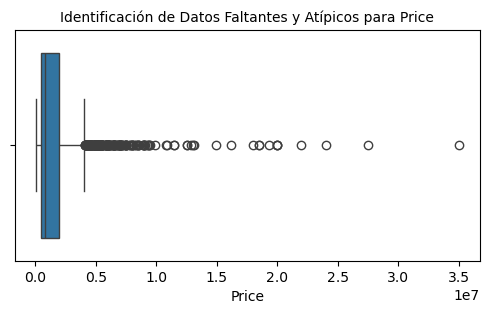

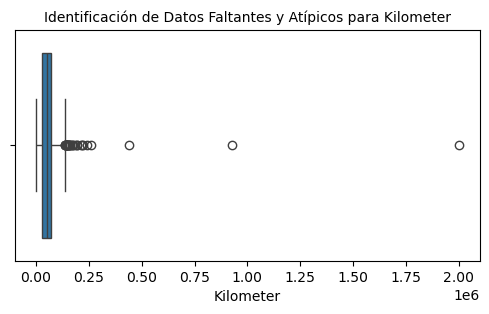

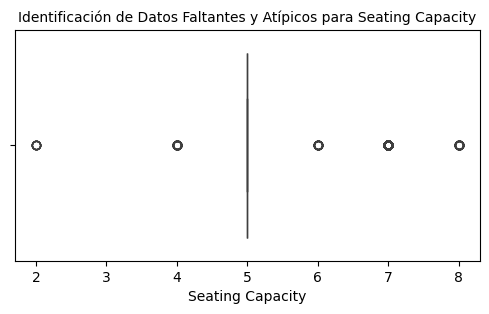

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de nombres de columnas
Data.columns = Data.columns.str.strip()

# Lista de columnas a analizar
columnas = ['Year', 'Price', 'Kilometer', 'Seating Capacity']

# Verificación de columnas
for col in columnas:
    if col not in Data.columns:
        print(f"La columna '{col}' no existe en el DataFrame.")
    else:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=Data[col])
        plt.title(f'Identificación de Datos Faltantes y Atípicos para {col}', fontsize=10)
        plt.show()  # Mostrar cada gráfico



In [12]:
# Revisión de datos faltantes
print("Cantidad de Registros con cero en Año: ", Data['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de venta: ", Data['Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kilómetros recorridos: ", Data['Kilometer'].isin([0]).sum())
print("Cantidad de Registros con cero en Asientos: ", Data['Seating Capacity'].isin([0]).sum())


Cantidad de Registros con cero en Año:  0
Cantidad de Registros con cero en Precio de venta:  0
Cantidad de Registros con cero en Kilómetros recorridos:  1
Cantidad de Registros con cero en Asientos:  0


In [14]:
import numpy as np

# Reemplazar ceros por NaN
Data.replace(0, np.nan, inplace=True)

# Llenar NaN con la media de las columnas numéricas
Data.fillna(Data.mean(numeric_only=True), inplace=True)

# Llenar NaN restantes (no numéricos) con 'NA'
Data.fillna('NA', inplace=True)


In [16]:
# Definir límites para datos atípicos
max_seats = 10
min_seats = 2
total_seats = ((Data['Seating Capacity'] < min_seats) | (Data['Seating Capacity'] > max_seats)).sum()

max_year = 2020
min_year = 1990
total_year = ((Data['Year'] < min_year) | (Data['Year'] > max_year)).sum()

print("Total registros en el dataset: {}".format(len(Data)))
print("El total de datos atípicos para la cantidad de asientos es: {}".format(total_seats))
print("El total de datos atípicos para el año es: {}".format(total_year))
print("")
Data.info()


Total registros en el dataset: 2059
El total de datos atípicos para la cantidad de asientos es: 0
El total de datos atípicos para el año es: 238

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   float64
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max Power           2059 non-null   object 
 13  Max Tor

In [18]:
# Filtra Datos Atípicos

Data = Data[(Data['Year'] < max_year) & (Data['Year'] > min_year)]
Data = Data[(Data['Seating Capacity'] < max_seats) & (Data['Seating Capacity'] > min_seats)]

In [20]:
# Validar si se removieron los datos atípicos

Total_Atipicos_year = ((Data['Year'] < min_year) | (Data['Year'] > max_year)).sum()
print("El total de datos atípicos para el año es: {}".format(Total_Atipicos_year))

Total_Atipicos_seats = ((Data['Seating Capacity'] < min_seats) | (Data['Seating Capacity'] > max_seats)).sum()
print("El total de datos atípicos para la cantidad de asientos es: {}".format(Total_Atipicos_seats))


El total de datos atípicos para el año es: 0
El total de datos atípicos para la cantidad de asientos es: 0


In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1682 non-null   object 
 1   Model               1682 non-null   object 
 2   Price               1682 non-null   int64  
 3   Year                1682 non-null   int64  
 4   Kilometer           1682 non-null   float64
 5   Fuel Type           1682 non-null   object 
 6   Transmission        1682 non-null   object 
 7   Location            1682 non-null   object 
 8   Color               1682 non-null   object 
 9   Owner               1682 non-null   object 
 10  Seller Type         1682 non-null   object 
 11  Engine              1682 non-null   object 
 12  Max Power           1682 non-null   object 
 13  Max Torque          1682 non-null   object 
 14  Drivetrain          1682 non-null   object 
 15  Length              1682 non-null   float64
 16  Width      

Nombres de las columnas: Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')
Intercepto (β0): -294377230.5761926
Coeficiente (Year, β1): 146714.63047541448


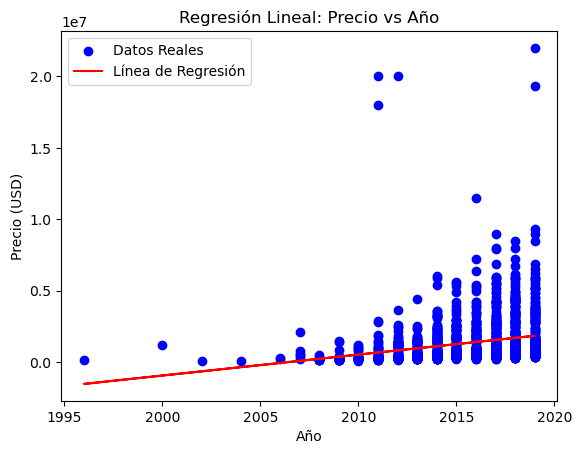

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir los datos en un DataFrame
df = pd.DataFrame(Data)

# Imprimir los nombres de las columnas
print("Nombres de las columnas:", df.columns)

# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Verificar si las columnas existen
if 'Year' in df.columns and 'Price' in df.columns:
    X = df[['Year']]
    y = df['Price']

    # Crear un modelo de regresión lineal
    modelo = LinearRegression()

    # Ajustar el modelo a los datos
    modelo.fit(X, y)

    # Coeficientes de la regresión
    beta_0 = modelo.intercept_  # Intercepto
    beta_1 = modelo.coef_[0]  # Pendiente (año)

    # Mostrar los coeficientes
    print(f"Intercepto (β0): {beta_0}")
    print(f"Coeficiente (Year, β1): {beta_1}")

    # Visualizar la regresión
    plt.scatter(df['Year'], y, color='blue', label='Datos Reales')
    plt.plot(df['Year'], modelo.predict(X), color='red', label='Línea de Regresión')
    plt.title('Regresión Lineal: Precio vs Año')
    plt.xlabel('Año')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.show()
else:
    print("Una o ambas columnas no existen en el DataFrame.")



In [ ]:
Regresion Lineal Multiple

Nombres de las columnas: Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')
Intercepto (β0): -287109750.27121896
Coeficiente (Year, β1): 143139.3650741311
Coeficiente (Kilometer, β2): -0.9985612743432203


C:\Users\MARITZA CASTELLANOS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


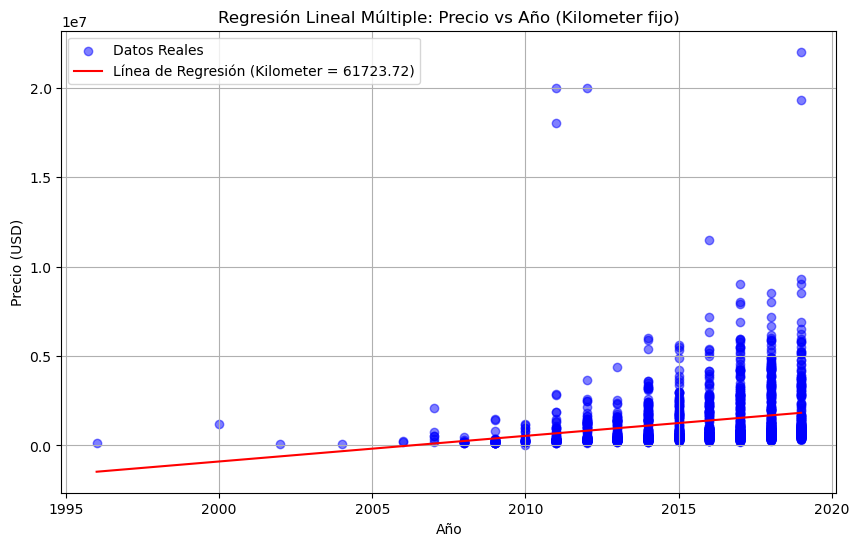

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir los datos en un DataFrame 
df = pd.DataFrame(Data)

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Imprimir los nombres de las columnas para verificar
print("Nombres de las columnas:", df.columns)

# Variables independientes (Year y Kilometer) y dependiente (Price)
X = df[['Year', 'Kilometer']]
y = df['Price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (Year y Kilometer)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Year, β1): {beta_1}")
print(f"Coeficiente (Kilometer, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante Kilometer)
kilometer_fijo = df['Kilometer'].mean()  # Fijar el Kilometer en la media para el gráfico
year_range = np.linspace(df['Year'].min(), df['Year'].max(), 100)

# Predecir manteniendo Kilometer constantes
predicciones_fijas = modelo.predict(np.column_stack((year_range, np.full_like(year_range, kilometer_fijo))))

# Graficar los datos reales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], y, color='blue', label='Datos Reales', alpha=0.5)
plt.plot(year_range, predicciones_fijas, color='red', label=f'Línea de Regresión (Kilometer = {kilometer_fijo:.2f})')
plt.title('Regresión Lineal Múltiple: Precio vs Año (Kilometer fijo)')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()


In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que 'Data' ya está definido y es un DataFrame
data_numerica = Data.copy()

# Convertir columnas de tipo object a numéricas
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

# Mostrar las primeras filas del DataFrame ajustado
print(data_numerica.head())


   Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0     6     85   505000  2017    87150.0          4             1        55   
1    17    641   450000  2014    75000.0          2             1        39   
2     7    822   220000  2011    67000.0          4             1        38   
3    28    404   799000  2019    37500.0          4             1        40   
4    28    442  1950000  2018    69000.0          2             1        44   

   Color  Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
0      7      1            1       7        253           5           1   
1     15      3            2       9        231          67           1   
2      8      1            2       6        242          11           1   
3     13      1            2       6        246          14           1   
4      7      1            2      56         67         144           3   

   Length   Width  Height  Seating Capacity  Fuel Tank Capacity  
0  3990.

Year
1996      1
2000      1
2002      1
2004      1
2006      2
2007      6
2008     13
2009     33
2010     26
2011     79
2012     92
2013    128
2014    191
2015    178
2016    186
2017    261
2018    265
2019    218
Name: count, dtype: int64


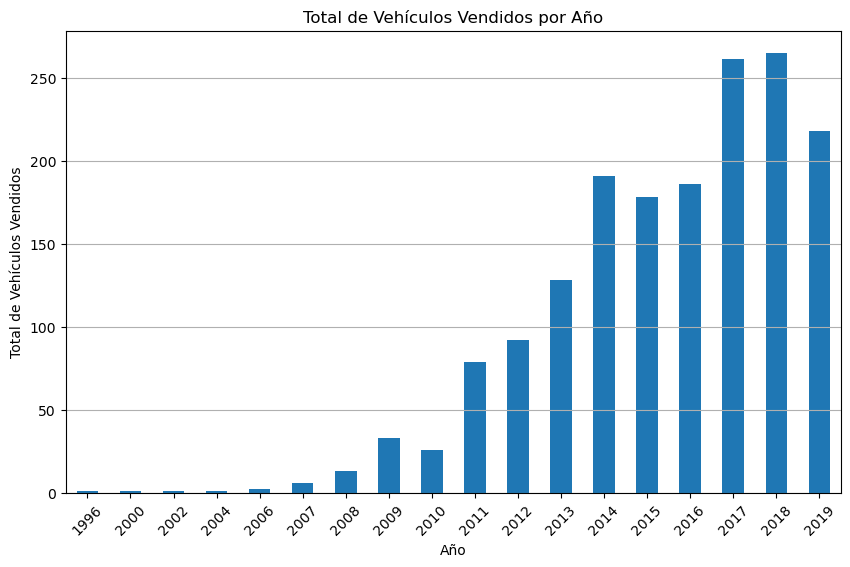

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'Data' ya está definido y es un DataFrame

# Total de vehículos vendidos por año
total_vehiculos_vendidos = Data['Year'].value_counts().sort_index()

# Mostrar el resultado
print(total_vehiculos_vendidos)

# Graficar los resultados
total_vehiculos_vendidos.plot(kind='bar', figsize=(10, 6))
plt.title('Total de Vehículos Vendidos por Año')
plt.xlabel('Año')
plt.ylabel('Total de Vehículos Vendidos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Cargar los datos
# data_numerica = pd.read_csv('ruta/del/archivo.csv') # Si tienes el archivo CSV

# Verificar los nombres de las columnas
print(data_numerica.columns)

# Seleccionar las variables independientes y dependientes
X = data_numerica[['Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Engine', 'Max Power', 'Max Torque']]
Y = data_numerica['Price']

# Convertir las variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Escalar las variables numéricas para mejorar el rendimiento del modelo
scaler = StandardScaler()
X[['Year', 'Kilometer']] = scaler.fit_transform(X[['Year', 'Kilometer']])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Definir el modelo (por ejemplo, Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Prediccion = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(Y_test, Prediccion)
mae = mean_absolute_error(Y_test, Prediccion)
mse = mean_squared_error(Y_test, Prediccion)
rmse = mse ** 0.5

# Imprimir los resultados
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

# Mostrar las primeras 2 filas del conjunto de entrenamiento
X_train.head(2)




Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')
R² (Coeficiente de determinación): 0.8425755907820458
Error Absoluto Medio (MAE): 220527.48656486822
Error Cuadrático Medio (MSE): 189955485426.80225
Raíz del Error Cuadrático Medio (RMSE): 435838.8296455494


,Year,Kilometer,Fuel Type,Transmission,Engine,Max Power,Max Torque
1184,-0.520916,-0.259938,4,1,6,247,18
261,0.895134,0.227744,4,1,98,211,235


In [87]:
#Validar datos en test
X_test.head(2)

,Year,Kilometer,Fuel Type,Transmission,Engine,Max Power,Max Torque
1252,-0.166904,0.13682,4,0,97,212,232
1157,0.895134,-0.31193,4,1,25,31,37


In [93]:
# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [95]:
# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

In [99]:
print (Prediccion)

[1307688.24710145 1791457.10365472  740857.61575876 1664344.46817853
  844172.86350272 1188972.32703855 1782783.96288877 1632449.23517926
 1496529.97148049 1561570.93962532 1475975.26576985 1176021.68113592
  997102.91813443 1985856.86771012 1779472.76518148 1658437.94354904
 1654824.33178071 1972567.18729376 1422816.5441044   888422.86495173
 1646320.11761917  849398.9564949  1446442.64262238 1589922.2578469
 1615910.96621668 1980434.67810024 1142945.14321075  980564.64917185
 1436992.20321519 1121681.65454457  874886.79157609 1139401.22843305
 1268705.18454679  505236.21631412 1972978.28140797 1972567.18729376
 1821999.74251384 1935946.73459089 1477384.56254645  545400.58379469
 1804280.16862536  599740.61038604 1406278.27514181  646353.22168685
  337498.50443627 1320682.60128634 1964298.05281246  886699.84083508
 1741671.00755271 1799554.94892176  412198.32142549 1697962.72529445
 1483063.09532524 1464162.21651086 1642588.37535825 1147670.36291435
 1792467.11936637 1943280.27557087 

In [101]:
# Evaluar el modelo
print('Coeficientes:', modelo_regresion.coef_)
print('Error cuadrático medio:', mean_squared_error(Y_test, Prediccion))
print('Coeficiente de determinación (R^2):', r2_score(Y_test, Prediccion))

Coeficientes: [425316.88972728 -71457.4315851 ]
Error cuadrático medio: 1181329361811.2546
Coeficiente de determinación (R^2): 0.02098075000512889


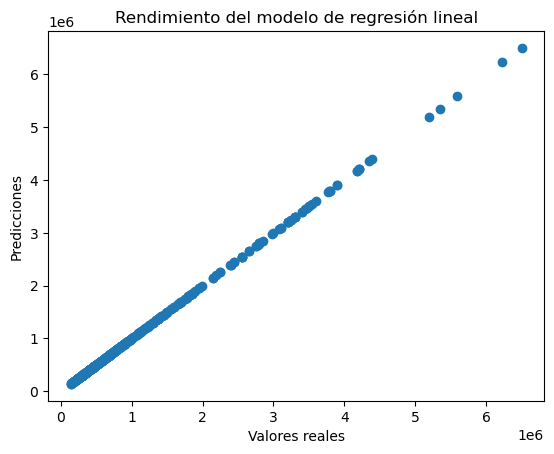

In [77]:
# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal")
plt.show()

Coeficientes: [ 1.45158246e+05 -1.06948570e+00]
Intercepto: -291146342.33703214
R² (Coeficiente de determinación): 0.07538255553267958
Error Absoluto Medio (MAE): 926741.5308430085
Error Cuadrático Medio (MSE): 1462179815086.8452
Raíz del Error Cuadrático Medio (RMSE): 1209206.274829421


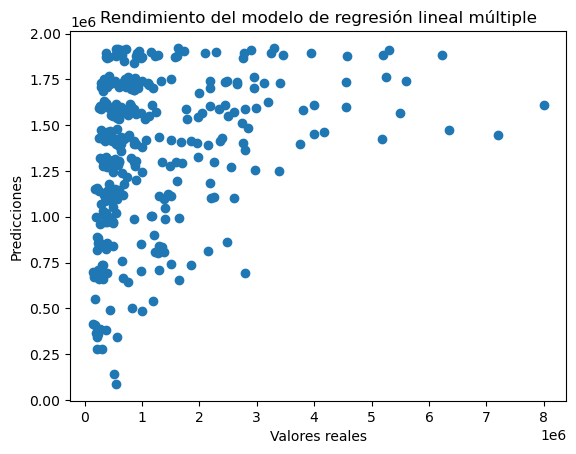

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supongamos que 'Data' es tu conjunto de datos cargado en el DataFrame 'df'
df = pd.DataFrame(Data)

# Variables independientes (Year y Kilometer) y dependiente (Price)
X = df[['Year', 'Kilometer']]
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Prediccion = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(Y_test, Prediccion)
mae = mean_absolute_error(Y_test, Prediccion)
mse = mean_squared_error(Y_test, Prediccion)
rmse = np.sqrt(mse)

# Evaluar el modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal múltiple")
plt.show()